# Used Car Sales Exploratory Data Analysis

This notebook performs EDA on usedcarsales.csv as per the specified steps.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Set style
sns.set_style('whitegrid')

In [ ]:
# Import usedcarsales.csv as salesdf
salesdf = pd.read_csv('C:/Users/Harini/Downloads/usedcarsales.csv')

In [8]:
# info()
salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1436 non-null   int64 
 1   Price         1436 non-null   int64 
 2   Age           1436 non-null   int64 
 3   KM            1436 non-null   int64 
 4   FuelType      1436 non-null   object
 5   HP            1436 non-null   int64 
 6   MetColor      1436 non-null   int64 
 7   Automatic     1436 non-null   int64 
 8   CC            1436 non-null   int64 
 9   Doors         1436 non-null   int64 
 10  Weight        1436 non-null   int64 
 11  AutoType      1436 non-null   object
 12  MetColorType  1436 non-null   object
dtypes: int64(10), object(3)
memory usage: 146.0+ KB


In [9]:
# head()
salesdf.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,AutoType,MetColorType
0,1,13500,23,46986,Diesel,90,1,0,2000,3,1165,Manual,Metcolor
1,2,13750,23,72937,Diesel,90,1,0,2000,3,1165,Manual,Metcolor
2,3,13950,24,41711,Diesel,90,1,0,2000,3,1165,Manual,Metcolor
3,4,14950,26,48000,Diesel,90,0,0,2000,3,1165,Manual,NonMetcolor
4,5,13750,30,38500,Diesel,90,0,0,2000,3,1170,Manual,NonMetcolor


In [10]:
# tail()
salesdf.tail()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,AutoType,MetColorType
1431,1432,7500,69,20544,Petrol,86,1,0,1300,3,1025,Manual,Metcolor
1432,1433,10845,72,19000,Petrol,86,0,0,1300,3,1015,Manual,NonMetcolor
1433,1434,8500,71,17016,Petrol,86,0,0,1300,3,1015,Manual,NonMetcolor
1434,1435,7250,70,16916,Petrol,86,1,0,1300,3,1015,Manual,Metcolor
1435,1436,6950,76,1,Petrol,110,0,0,1600,5,1114,Manual,NonMetcolor


In [11]:
# columns
salesdf.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight', 'AutoType', 'MetColorType'],
      dtype='object')

In [12]:
# Split Data into numeric and object columns
numeric_cols = salesdf.select_dtypes(include=[np.number]).columns
object_cols = salesdf.select_dtypes(include=['object']).columns
print('Numeric columns:', list(numeric_cols))
print('Object columns:', list(object_cols))

Numeric columns: ['Unnamed: 0', 'Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']
Object columns: ['FuelType', 'AutoType', 'MetColorType']


In [13]:
# describe() of numeric columns
salesdf[numeric_cols].describe()

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,718.500000,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,414.681806,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,359.750000,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,718.500000,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,1077.250000,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,1436.000000,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [14]:
# value_counts() of object columns
for col in object_cols:
    print(f'\nValue counts for {col}:')
    print(salesdf[col].value_counts())


Value counts for FuelType:
FuelType
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

Value counts for AutoType:
AutoType
Manual    1356
Auto        80
Name: count, dtype: int64

Value counts for MetColorType:
MetColorType
Metcolor       969
NonMetcolor    467
Name: count, dtype: int64


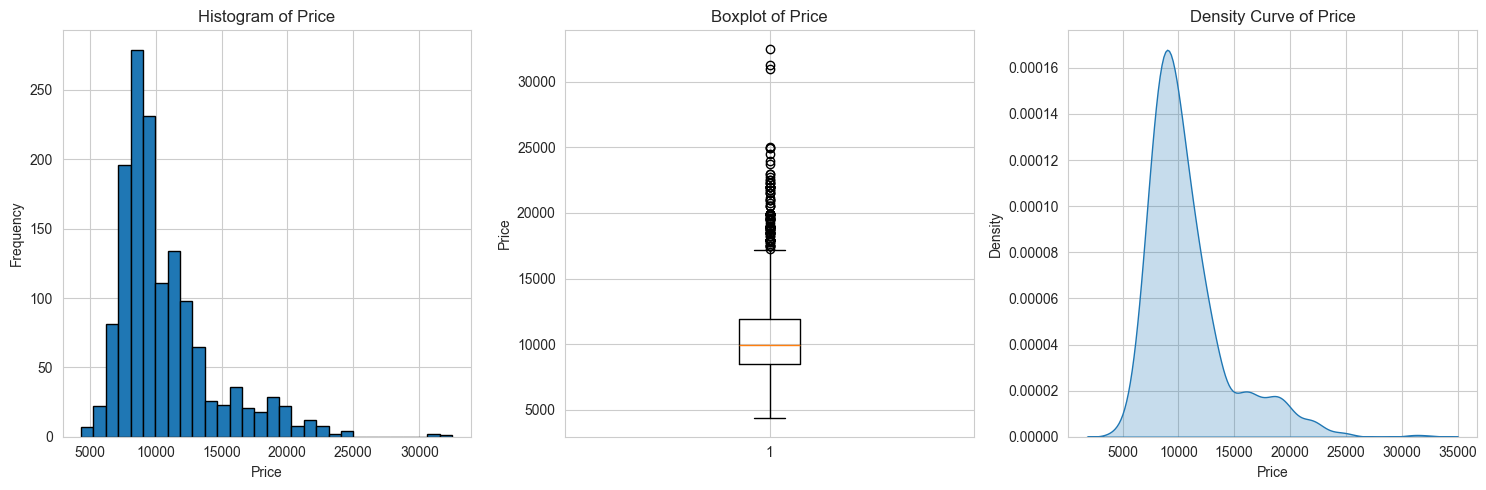

In [15]:
# Histogram, Boxplot, Density Curve - Price
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(salesdf['Price'], bins=30, edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(salesdf['Price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
sns.kdeplot(salesdf['Price'], fill=True)
plt.title('Density Curve of Price')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

In [16]:
# Correlation of numeric columns
corr = salesdf[numeric_cols].corr()
print('Correlation matrix:')
corr

Correlation matrix:


,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Unnamed: 0,1.000000,-0.738289,0.906163,0.273211,-0.109381,-0.079730,0.066299,-0.184490,-0.130268,-0.414577
Price,-0.738289,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.165067,0.185326,0.581198
Age,0.906163,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.133182,-0.148359,-0.470253
KM,0.273211,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.302150,-0.036197,-0.028598
HP,-0.109381,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.050884,0.092424,0.089614
MetColor,-0.079730,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.034921,0.085243,0.057929
Automatic,0.066299,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,-0.069321,-0.027654,0.057249
CC,-0.184490,0.165067,-0.133182,0.302150,0.050884,0.034921,-0.069321,1.000000,0.126768,0.651450
Doors,-0.130268,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.126768,1.000000,0.302618
Weight,-0.414577,0.581198,-0.470253,-0.028598,0.089614,0.057929,0.057249,0.651450,0.302618,1.000000


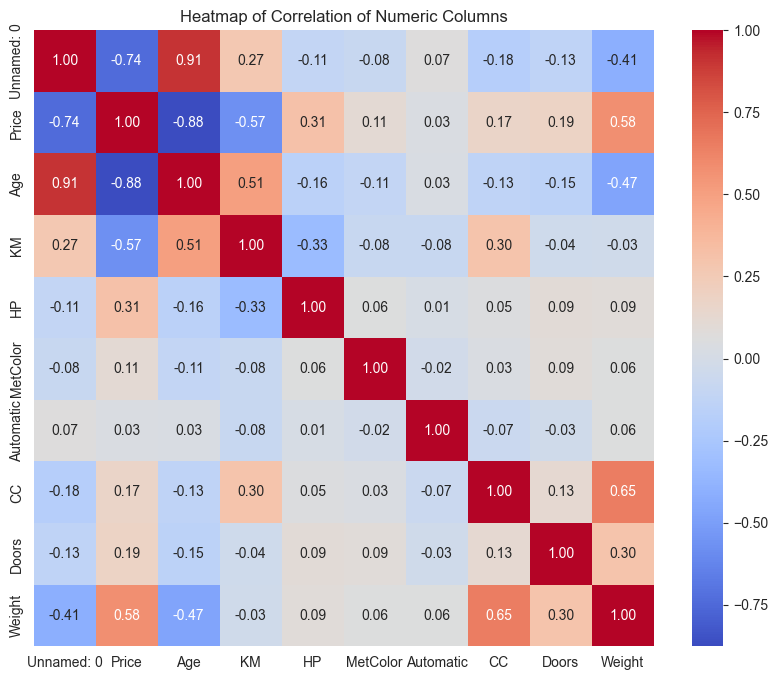

In [17]:
# Heatmap of Correlation of Numeric Columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation of Numeric Columns')
plt.show()

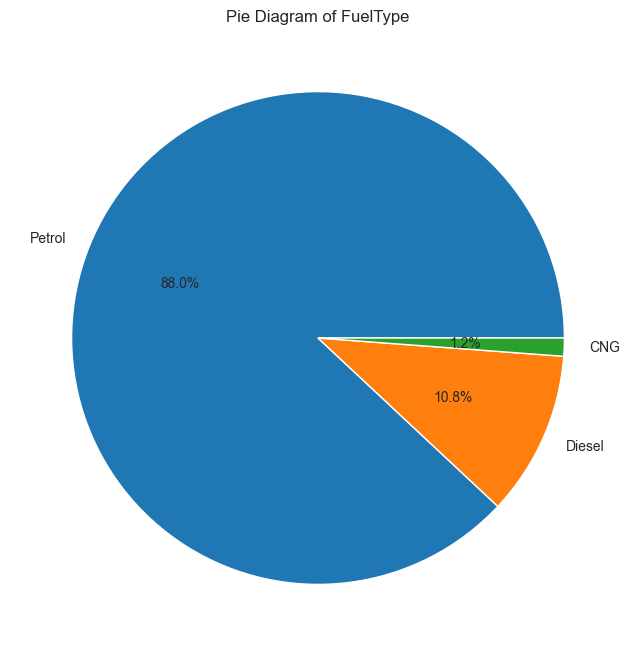

In [18]:
# Pie Diagram of FuelType
salesdf['FuelType'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Pie Diagram of FuelType')
plt.ylabel('')
plt.show()

In [19]:
# Standard Scale, Min Max Scale & Robust Scale of numeric columns

# Standard Scaler
scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(salesdf[numeric_cols])
scaled_std_df = pd.DataFrame(scaled_std, columns=numeric_cols)
print('Standard Scaled data (first 5 rows):')
print(scaled_std_df.head())

# Min Max Scaler
scaler_mm = MinMaxScaler()
scaled_mm = scaler_mm.fit_transform(salesdf[numeric_cols])
scaled_mm_df = pd.DataFrame(scaled_mm, columns=numeric_cols)
print('\nMin Max Scaled data (first 5 rows):')
print(scaled_mm_df.head())

# Robust Scaler
scaler_rob = RobustScaler()
scaled_rob = scaler_rob.fit_transform(salesdf[numeric_cols])
scaled_rob_df = pd.DataFrame(scaled_rob, columns=numeric_cols)
print('\nRobust Scaled data (first 5 rows):')
print(scaled_rob_df.head())

Standard Scaled data (first 5 rows):
   Unnamed: 0     Price       Age        KM        HP  MetColor  Automatic  \
0   -1.730845  0.763763 -1.771966 -0.574695 -0.768042  0.694219  -0.242893   
1   -1.728433  0.832715 -1.771966  0.117454 -0.768042  0.694219  -0.242893   
2   -1.726020  0.887877 -1.718184 -0.715386 -0.768042  0.694219  -0.242893   
3   -1.723608  1.163685 -1.610620 -0.547650 -0.768042 -1.440467  -0.242893   
4   -1.721196  0.832715 -1.395491 -0.801028 -0.768042 -1.440467  -0.242893   

         CC     Doors    Weight  
0  2.314976 -1.085139  1.758561  
1  2.314976 -1.085139  1.758561  
2  2.314976 -1.085139  1.758561  
3  2.314976 -1.085139  1.758561  
4  2.314976 -1.085139  1.853577  

Min Max Scaled data (first 5 rows):
   Unnamed: 0     Price       Age        KM        HP  MetColor  Automatic  \
0    0.000000  0.325044  0.278481  0.193355  0.170732       1.0        0.0   
1    0.000697  0.333925  0.278481  0.300149  0.170732       1.0        0.0   
2    0.001394  0.34

Logarithmic Transformation of Price (first 5 rows):
   Price  Price_log
0  13500   9.510445
1  13750   9.528794
2  13950   9.543235
3  14950   9.612467
4  13750   9.528794


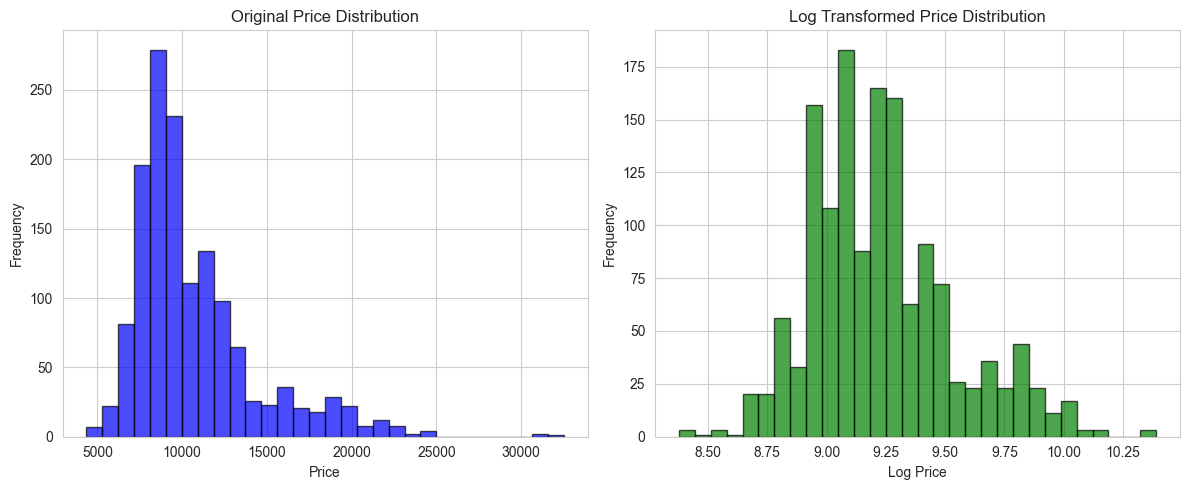

In [20]:
# Logarithmic Transformation of Price
salesdf['Price_log'] = np.log(salesdf['Price'])
print('Logarithmic Transformation of Price (first 5 rows):')
print(salesdf[['Price', 'Price_log']].head())

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(salesdf['Price'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(salesdf['Price_log'], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Log Transformed Price Distribution')
plt.xlabel('Log Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()